### Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python

clase 17/10/2019

#### Docentes:  Dra. Valeria S. Rulloni - Dra. Laura M. Vargas
* Ayudantes: Axel Aguerreberry - Sebastián Palacio
* Colaboradoras: Dra. Ana Carolina Maldonado - Dra. Claudia Egea

### Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	**Umbralado y Binarización.** Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Clasificación de imágenes.
*	Aprendizaje automático
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones: Grafos para segmentación de imágenes, entre otras.

**Imágenes necesarias: 'lenna.jpg', 'ortopantomografia2.png','monedas.jpg', 'daisy.jpg', 'sudoku.png'**

# Histograma
### El **Histograma** de una imagen es la gráfica que muestra la cantidad de píxeles que tienen una misma intensidad luminosa, para todas las intensidades.

### Muestra gráficamente el vector de frecuencias de las intensidades presentes en la imagen.

## Ejemplos Histogramas
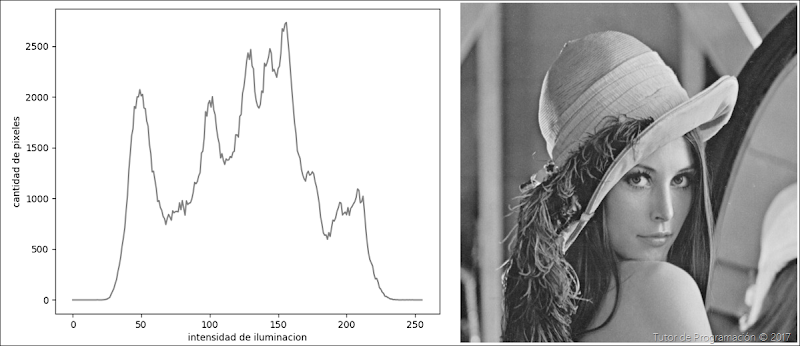






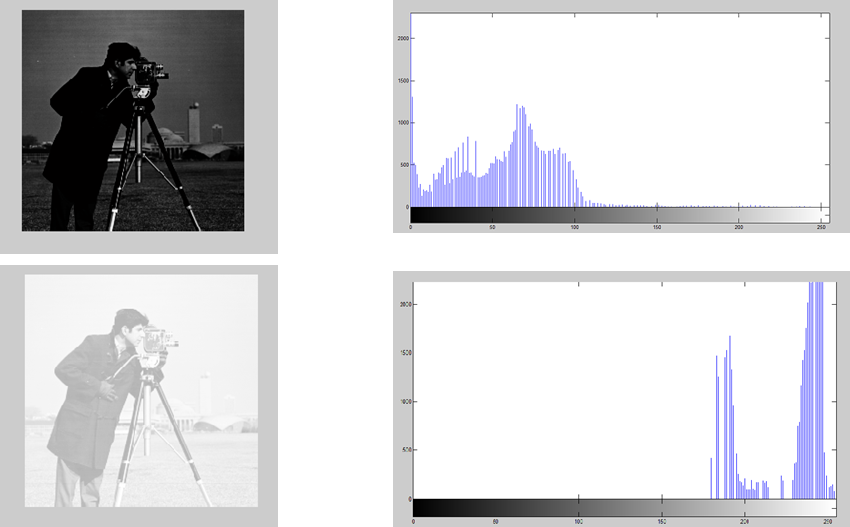

In [15]:
import seaborn as sns

#sns.set_style("whitegrid")

# VER BIEN PORQUE CUANDO CAMBIO EL UMBRAL EN DAISY NO CAMBIA EN "BINARIZADO POR UMBRALIZADO"

tamaño de la imagen monocroma: (512, 512)


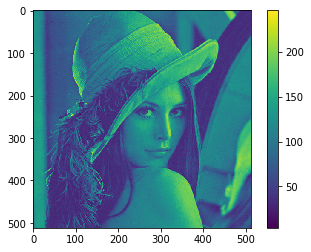

In [16]:
#Cargo imagen monocroma y grafico
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lenna.jpg',0)#El 0 indica que devuelve imagen monocroma directamente
#imgg = cv2.imread('lenna.jpg', cv2.IMREAD_GRAYSCALE)#equivalente al anterior
#print(abs(img-imgg).max())
print('tamaño de la imagen monocroma:', img.shape)

import matplotlib.pyplot as plt
plt.imshow(img)
#plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

## Histograma obtenido mediante opencv o mediante matplotlib
**Histograma mediante opencv:**

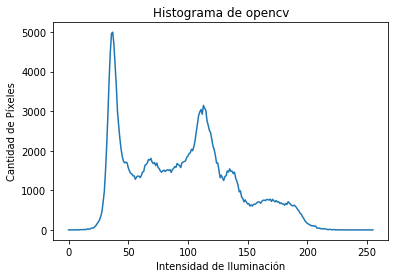

In [17]:
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) #Devuelve un vector

#El nombre de la imagen debe estar entre corchetes
#Channels indica para qué canal se pide el histograma. Puede ser 0, 1 o 2. 
#Si la imagen es gris se pone 0.
#Si el histograma es de la imagen completa se coloca como máscara None. 
#Se puede pedir el histograma de una parte de la imagen, mediante una máscara. 
#histsize indica la cantidad de bins. Si queremos contabilizar la frecuencia de todas las intensidades
#y tenemos 256 valores, colocamos 256 entre corchetes. Podemos agruparlos. Pedir por ejemplo 16 bins.
#ranges es el rango. En nuestro caso, normalmente es [0,256]
#Así hist será un array de 256x1

hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")
plt.title("Histograma de opencv")
plt.show()

**Histograma mediante matplotlib**

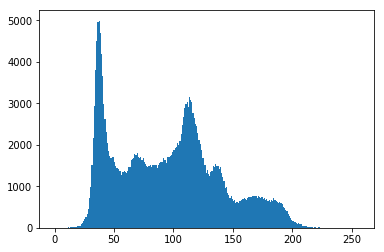

In [18]:
plt.hist(img.ravel(), 256,[0,256] ) #sin límites hace autoescalado de los ejes
#plt.title('histograma'), plt.xlabel('intensidad de iluminacion'), plt.ylabel('cantidad de pixeles')
plt.show()

**Repita el procedimiento para la imagen ortopantomografia2.png (abra la imagen en monocroma y muestre su histograma)**

---

tamaño de la imagen monocroma: (267, 438)


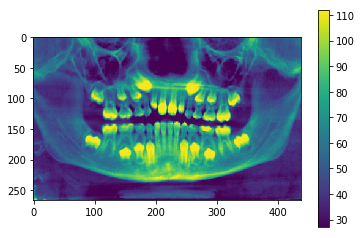

In [19]:
#Cargo imagen monocroma y grafico
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('ortopantomografia2.png', 0)#El 0 indica que devuelve imagen monocroma directamente
#imgg = cv2.imread('lenna.jpg', cv2.IMREAD_GRAYSCALE)#equivalente al anterior
#print(abs(img-imgg).max())
print('tamaño de la imagen monocroma:', img.shape)

import matplotlib.pyplot as plt
plt.imshow(img)
#plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

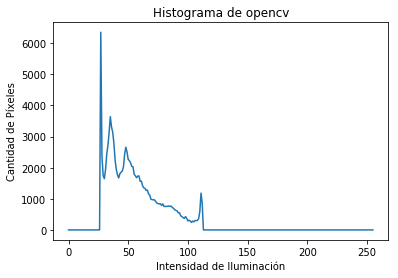

In [20]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")
plt.title("Histograma de opencv")
plt.show()

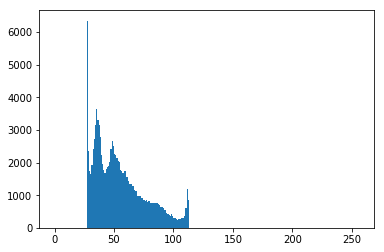

In [21]:
plt.hist(img.ravel(), 256,[0,256] ) #sin límites hace autoescalado de los ejes
#plt.title('histograma'), plt.xlabel('intensidad de iluminacion'), plt.ylabel('cantidad de pixeles')
plt.show()

---

## Binarización por Umbralizado
* Primero se define un valor de corte llamado $umbral$, con algún criterio (arbitrario, 127, media, Otsu, etc.)
 $$T(r)=\left\{
\begin{array}{lr}
  1& r\geq umbral\\
	0& r<umbral\\	
\end{array}
\right.$$

*O su negativo:

$$T(r)=\left\{
\begin{array}{lr}
  0& r\geq umbral\\
	1& r<umbral\\	
\end{array}
\right.$$




* Se puede generalizar a segmentación por umbralizado (varios umbrales, por ejemplo MultiOtsu)



**Inspecione el histograma de la imagen elija un valor de umbral para binarizar la imagen (selección manual/arbitraria)**

In [22]:
umbral=int(input('ingrese un valor de umbral entre 0 y 255: ' ))
print(type(umbral))

ingrese un valor de umbral entre 0 y 255:  5


<class 'int'>


**Obtenga la imagen binaria resultante de utilizar el umbral elegido por el usuario y muéstrela**

**Ahora se repite el procedimiento y muestran los respectivos histogramas a la par de cada imagen, utilizando la imagen 'monedas.jpg': **

---

<class 'numpy.ndarray'>


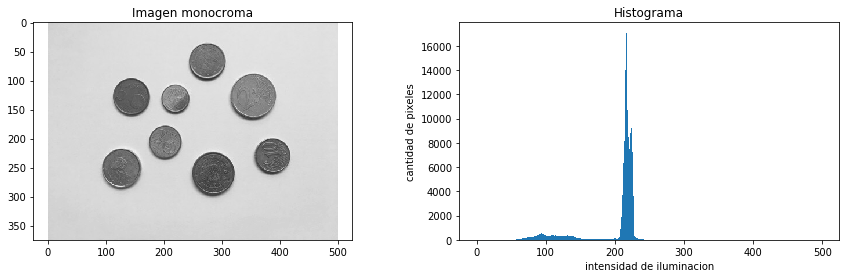

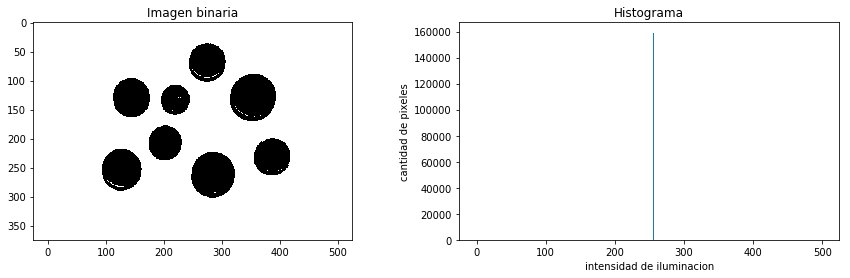

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('monedas.jpg',0) #imagen monocroma
umbral=180 #arbitrario
binaria=(img>=umbral)
binaria=255*binaria.astype('uint8')
print(type(binaria))

##Primer par de gráficos:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen monocroma')
axs[1].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')

##Segundo par de gráficos:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(binaria, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen binaria')
axs[1].hist(binaria[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')

plt.show()


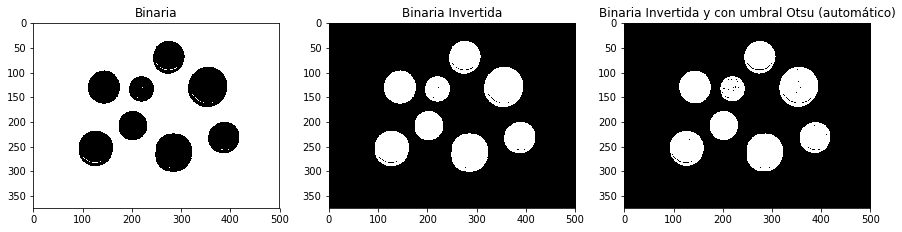

umbral calculado por Otsu: 162.0


In [24]:
#continuación
umbral=180
ret1,binaria1 = cv2.threshold(img,umbral,255,cv2.THRESH_BINARY)
ret2,binaria2 = cv2.threshold(img,umbral,255,cv2.THRESH_BINARY_INV)
# Otsu's thresholding
ret3,binaria3 = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(binaria1, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Binaria')
axs[1].imshow(binaria2, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Binaria Invertida')
axs[2].imshow(binaria3, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Binaria Invertida y con umbral Otsu (automático)')
plt.show()
print('umbral calculado por Otsu:', ret3)


**A partir de la imagen 'daisy.jpg', obtenga una imagen binaria con unos/true/255 en el lugar de la flor (máscara)**

---

<class 'numpy.ndarray'>


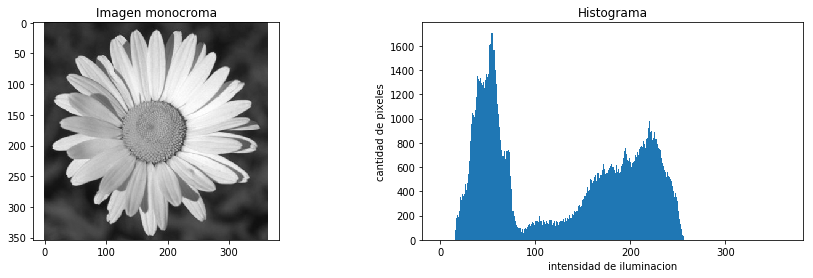

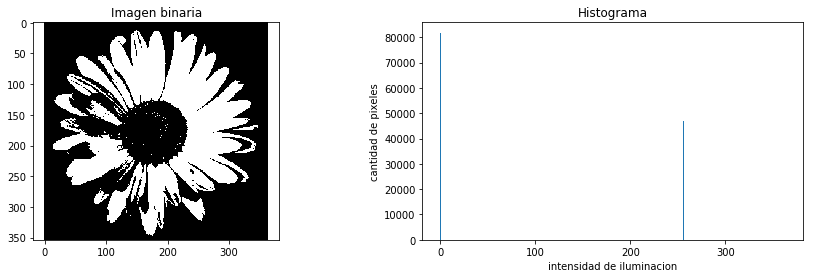

In [46]:
umbral = 241

import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('daisy.jpg',0) #imagen monocroma
umbral=180 #arbitrario
binaria=(img>=umbral)
binaria=255*binaria.astype('uint8')
print(type(binaria))

##Primer par de gráficos:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen monocroma')
axs[1].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')

##Segundo par de gráficos:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(binaria, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen binaria')
axs[1].hist(binaria[:,:].ravel(), 256,[0,256] ) 
axs[1].set_title('Histograma')
axs[1].set_xlabel('intensidad de iluminacion')
axs[1].set_ylabel('cantidad de pixeles')

plt.show()


---

**Otro ejemplo**

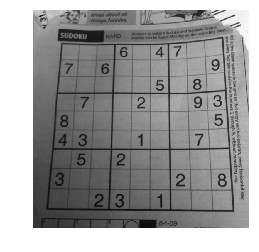

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('sudoku.png',0) #imagen monocroma
plt.imshow(img, cmap='gray'), plt.axis('off')
plt.show()

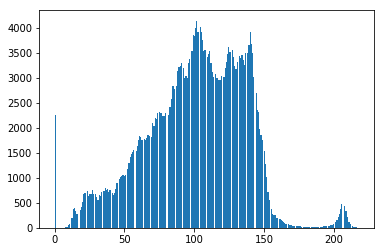

In [36]:
plt.hist(img.ravel(),256)
plt.show()

el umbral utilizado fue: 57
valores de imagen binaria:  0 y 255


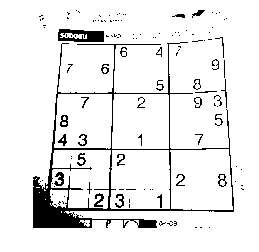

In [43]:
#binarización
# umbral = img.mean()
umbral=57
print('el umbral utilizado fue:', umbral)#se elige la media como umbral
ret4,binaria4 = cv2.threshold(img,umbral,255,cv2.THRESH_BINARY)
print('valores de imagen binaria: ', binaria4.min(),'y', binaria4.max())
plt.imshow(binaria4, cmap='gray'), plt.axis('off')
plt.show()

### Binarización adaptativa (umbral local: media o media ponderada gaussiana)

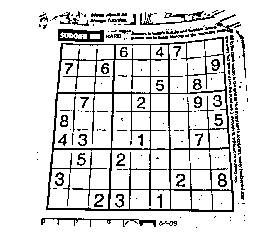

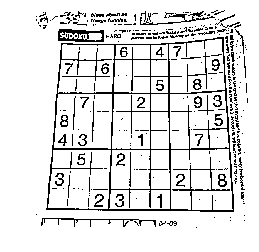

In [48]:
binaria5 = cv2.adaptiveThreshold(cv2.imread('sudoku.png',0),255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,6)
binaria6 = cv2.adaptiveThreshold(cv2.imread('sudoku.png',0),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,6)
plt.imshow(binaria5, cmap='gray'), plt.axis('off')
plt.show()
plt.imshow(binaria6, cmap='gray'),plt.axis('off')
plt.show()

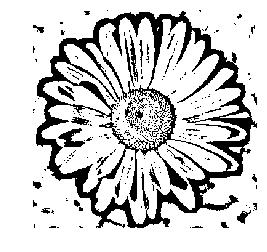

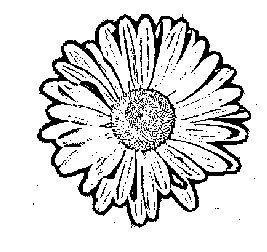

In [49]:
binaria5 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,6)
binaria6 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,6)
plt.imshow(binaria5, cmap='gray'), plt.axis('off')
plt.show()
plt.imshow(binaria6, cmap='gray'),plt.axis('off')
plt.show()

**Ejercicio: A partir de la imagen 'daisy.jpg', calcular una imagen binaria con los bordes de la flor:**

* primero: abrir la imagen y pasar a monocroma
* segundo: aplicar filtro de bordes 

> ayuda: 
> - cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3) ó
> - cv2.filter2D(img,CV_64F, kernel,borderType = cv2.BORDER_CONSTANT))

* tercero: binarizar

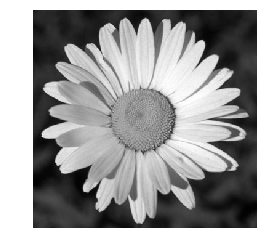

In [68]:
# EJERCICIO

import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('daisy.jpg',0) #imagen monocroma
plt.imshow(img, cmap='gray')
plt.show()

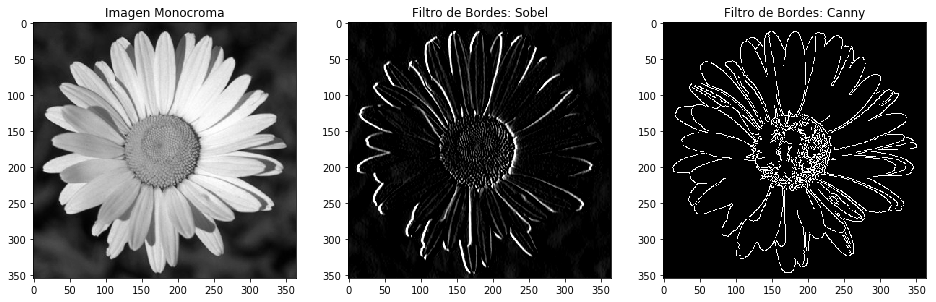

In [102]:
# EJERCICIO

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('daisy.jpg',0) #imagen monocroma
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Filtro Sobel
canny = cv2.Canny(img, 50, 200)  # Filtro Canny

fig = plt.gcf()
fig.set_size_inches(16, 5)

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Monocroma')

plt.subplot(1,3,2)
plt.imshow(sobelx, cmap='gray', vmin=0, vmax=255)
plt.title('Filtro de Bordes: Sobel')

plt.subplot(1,3,3)
plt.imshow(canny, cmap='gray', vmin=0, vmax=255)
plt.title('Filtro de Bordes: Canny')

plt.show()

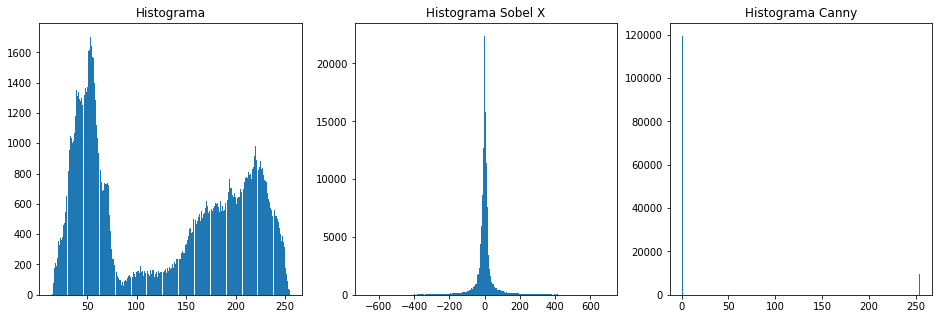

In [104]:
fig = plt.gcf()
fig.set_size_inches(16, 5)

plt.subplot(1,3,1)
plt.hist(img.ravel(),256)
plt.title('Histograma')

plt.subplot(1,3,2)
plt.hist(sobelx.ravel(),256)
plt.title('Histograma Sobel X')

plt.subplot(1,3,3)
plt.hist(canny.ravel(),256)
plt.title('Histograma Canny')

plt.show()

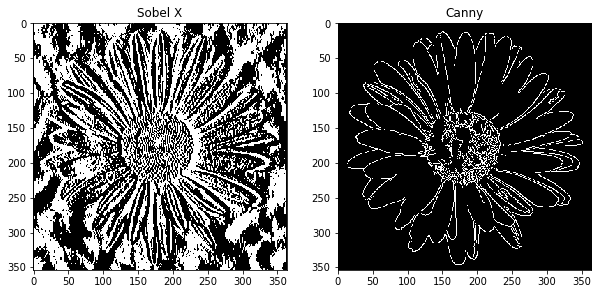

In [105]:
%matplotlib inline

UMBRAL = 0

fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.subplot(1,2,1)
ret4, binaria7 = cv2.threshold(sobelx, UMBRAL, 255, cv2.THRESH_BINARY)
plt.imshow(binaria7, cmap='gray')
plt.title('Sobel X')

plt.subplot(1,2,2)
ret4, binaria7 = cv2.threshold(canny, UMBRAL, 255, cv2.THRESH_BINARY)
plt.imshow(binaria7, cmap='gray')
plt.title('Canny')
plt.show()

### ¿Cómo pueden mejorarse las binarizaciones (segmentaciones binarias) encontradas?